In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import glob
import os

In [17]:
print("="*50)
print("1. EXTRACCIÓN DE DATOS")
print("="*50)

1. EXTRACCIÓN DE DATOS


In [29]:
# EXTRACCION DE LOS DATOS
# creamos la ruta de la carpeta donde vamos a almacenar los archivos Excel que se van a generar por la operacion.
ruta = r"C:\Autonoma\gestion_almacenamiento_datos\repo_gestion_servicios\*.xlsx"

# creamos la lista para almacenar los DataFrames
file = []

try:
    # Buscamos y leemos todos los archivos Excel en la carpeta repositorio
    for f in glob.glob(ruta):
        df = pd.read_excel(f)
        file.append(df)

    # Concatenamos todos los archivos en un solo DataFrame
    df = pd.concat(file, ignore_index=True)
    
    print(f"Archivo cargado exitosamente. Dimensiones: {df.shape}")

except Exception as e:
    print(f"Error al cargar el archivo: {e}")

Archivo cargado exitosamente. Dimensiones: (1343, 19)


In [33]:
# Mostramos las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
print(df.head())


Primeras filas del DataFrame:
   ticket_id            ticket  customer_id             Empresa  \
0      16917  2025021710000211    900668922  CLINICA CASTELLANA   
1      16916  2025021710000202    900668922  CLINICA CASTELLANA   
2      16905  2025021710000097    900668922  CLINICA CASTELLANA   
3      16903  2025021710000079    900668922  CLINICA CASTELLANA   
4      16900  2025021710000042    900668922  CLINICA CASTELLANA   

                                          asunto  Periodo  \
0                        SOLICITUD DE PLATAFORMA  2025-02   
1                               REVISIÓN TECLADO  2025-02   
2  IMPRESORA DE JAZMIN Y HORTTENSIA NO FUNCIONAN  2025-02   
3                                   PUNTO DE RED  2025-02   
4                        LA IMPRESORA NO IMPRIME  2025-02   

               create_time              change_time  Dias fecha_esfuerzo  \
0  2025-02-17 09:59:52.000  2025-02-17 09:59:52.000     0     2025-02-17   
1  2025-02-17 09:39:20.000  2025-02-17 09:39:20

In [45]:
# 2. PREANALISIS DESCRIPTIVO DE LOS DATOS  DATOS
print("="*50)
print("2. PREANALISIS DESCRIPTIVO DE LOS DATOS  DATOS")
print("="*50)

2. PREANALISIS DESCRIPTIVO DE LOS DATOS  DATOS


In [47]:
# Información general deL DataFrame
print(df.info())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ticket_id       1343 non-null   int64         
 1   ticket          1343 non-null   int64         
 2   customer_id     1343 non-null   int64         
 3   Empresa         1343 non-null   object        
 4   asunto          1343 non-null   object        
 5   Periodo         1343 non-null   object        
 6   create_time     1343 non-null   object        
 7   change_time     1343 non-null   object        
 8   Dias            1343 non-null   int64         
 9   fecha_esfuerzo  1343 non-null   datetime64[ns]
 10  cola            1343 non-null   object        
 11  usuario         1343 non-null   object        
 12  propietario     1343 non-null   object        
 13  cod_estado      1343 non-null   int64         
 14  estado_otrs     1343

In [55]:
# Descripción estadística de las variables numéricas
print("\nEstadísticas descriptivas de variables numéricas:")
print(df.describe())


Estadísticas descriptivas de variables numéricas:
          ticket_id        ticket  customer_id         Dias  \
count   1343.000000  1.343000e+03       1343.0  1343.000000   
mean   14428.881608  2.024437e+15  900668922.0     7.345495   
min    10125.000000  2.024072e+15  900668922.0     0.000000   
25%    13420.500000  2.024112e+15  900668922.0     0.000000   
50%    14229.000000  2.024121e+15  900668922.0     0.000000   
75%    15556.500000  2.025012e+15  900668922.0     6.000000   
max    16917.000000  2.025022e+15  900668922.0   102.000000   
std     1313.744976  4.326518e+11          0.0    15.227869   

                      fecha_esfuerzo   cod_estado  time_unidades        horas  
count                           1343  1343.000000    1343.000000  1343.000000  
mean   2024-12-22 18:13:40.253164544     2.197319     186.785555     3.113094  
min              2024-07-18 00:00:00     1.000000       0.000000     0.000000  
25%              2024-11-27 00:00:00     2.000000       0.000

In [59]:
# Verificamos valores nulos
print(df.isnull().sum())

ticket_id         0
ticket            0
customer_id       0
Empresa           0
asunto            0
Periodo           0
create_time       0
change_time       0
Dias              0
fecha_esfuerzo    0
cola              0
usuario           0
propietario       0
cod_estado        0
estado_otrs       0
time_unidades     0
horas             0
estado_final      0
URL               0
dtype: int64


In [61]:
print("\nConteo total de casos abiertos y cerrados:")
print(df["estado_final"].value_counts())


Estados únicos en estado_final:
estado_final
CERRADO    1237
ABIERTO     106
Name: count, dtype: int64



Distribución de 'Dias':


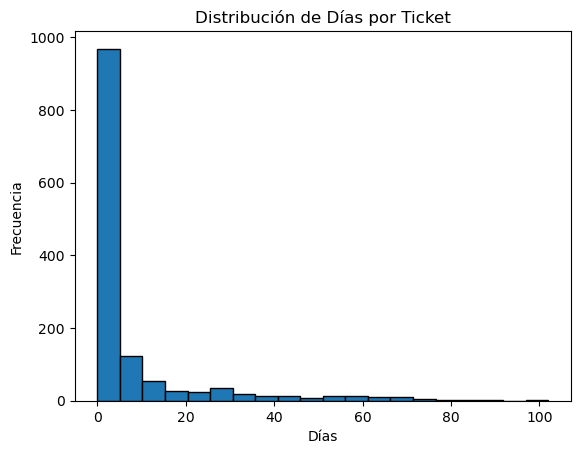

In [63]:
print("\nDistribución de 'Dias':")
plt.hist(df["Dias"].dropna(), bins=20, edgecolor='black')
plt.xlabel("Días")
plt.ylabel("Frecuencia")
plt.title("Distribución de Días por Ticket")
plt.show()

In [71]:
print("\nCorrelación entre variables numéricas:")
print(df.corr(numeric_only=True))


Correlación entre variables numéricas:
               ticket_id    ticket  customer_id      Dias  cod_estado  \
ticket_id       1.000000  0.860138          NaN -0.244968   -0.019295   
ticket          0.860138  1.000000          NaN -0.285209   -0.003608   
customer_id          NaN       NaN          NaN       NaN         NaN   
Dias           -0.244968 -0.285209          NaN  1.000000    0.080827   
cod_estado     -0.019295 -0.003608          NaN  0.080827    1.000000   
time_unidades  -0.051658 -0.041185          NaN  0.142078   -0.010429   
horas          -0.051658 -0.041185          NaN  0.142078   -0.010429   

               time_unidades     horas  
ticket_id          -0.051658 -0.051658  
ticket             -0.041185 -0.041185  
customer_id              NaN       NaN  
Dias                0.142078  0.142078  
cod_estado         -0.010429 -0.010429  
time_unidades       1.000000  1.000000  
horas               1.000000  1.000000  


In [83]:
print("="*50)
print("3. LIMPIEZA DE DATOS")
print("="*50)

3. LIMPIEZA DE DATOS


In [85]:
# sacamos una copia del DataFrame original 
df_depurado = df.copy()

In [87]:
# Convertimos fechas a formato datetime
try:
    df_depurado['create_time'] = pd.to_datetime(df_depurado['create_time'])
    df_depurado['change_time'] = pd.to_datetime(df_depurado['change_time'])
    
    # Convertir fecha_esfuerzo al formato datetime
    df_depurado['fecha_esfuerzo'] = pd.to_datetime(df_depurado['fecha_esfuerzo'], format='%d/%m/%Y')
    
    print("Conversión de fechas completada.")
except Exception as e:
    print(f"Error al convertir fechas: {e}")

Conversión de fechas completada.


In [89]:
df_depurado

,ticket_id,ticket,customer_id,Empresa,asunto,Periodo,create_time,change_time,Dias,fecha_esfuerzo,cola,usuario,propietario,cod_estado,estado_otrs,time_unidades,horas,estado_final,URL
0,16917,2025021710000211,900668922,CLINICA CASTELLANA,SOLICITUD DE PLATAFORMA,2025-02,2025-02-17 09:59:52,2025-02-17 09:59:52,0,2025-02-17,CLINICA CASTELLANA::SOPORTE SISTEMAS,BRAYAN.MUÑOZ,root@localhost,1,NEW,0,0.000000,ABIERTO,https://otrs.neuromedica.co/otrs/index.pl?Acti...
1,16916,2025021710000202,900668922,CLINICA CASTELLANA,REVISIÓN TECLADO,2025-02,2025-02-17 09:39:20,2025-02-17 09:39:20,0,2025-02-17,CLINICA CASTELLANA::SOPORTE SISTEMAS,AMALIA.RIVERA,root@localhost,1,NEW,0,0.000000,ABIERTO,https://otrs.neuromedica.co/otrs/index.pl?Acti...
2,16905,2025021710000097,900668922,CLINICA CASTELLANA,IMPRESORA DE JAZMIN Y HORTTENSIA NO FUNCIONAN,2025-02,2025-02-17 07:42:21,2025-02-17 07:42:21,0,2025-02-17,CLINICA CASTELLANA::SOPORTE SISTEMAS,MAYRA.LOZANO,root@localhost,1,NEW,0,0.000000,ABIERTO,https://otrs.neuromedica.co/otrs/index.pl?Acti...
3,16903,2025021710000079,900668922,CLINICA CASTELLANA,PUNTO DE RED,2025-02,2025-02-17 07:35:41,2025-02-17 07:35:41,0,2025-02-17,CLINICA CASTELLANA::SOPORTE SISTEMAS,MELANY.DELGADO,root@localhost,1,NEW,0,0.000000,ABIERTO,https://otrs.neuromedica.co/otrs/index.pl?Acti...
4,16900,2025021710000042,900668922,CLINICA CASTELLANA,LA IMPRESORA NO IMPRIME,2025-02,2025-02-17 07:08:13,2025-02-17 08:06:50,0,2025-02-17,CLINICA CASTELLANA::SOPORTE SISTEMAS,FELIPE.VELASQUEZ,nestor.gonzalez,2,CLOSED SUCCESSFUL,0,0.000000,CERRADO,https://otrs.neuromedica.co/otrs/index.pl?Acti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,11918,2024100410000197,900668922,CLINICA CASTELLANA,PRUEBA 2,2024-10,2024-10-04 15:25:11,2024-10-04 15:26:07,0,2024-10-04,CLINICA CASTELLANA::SOPORTE SISTEMAS,JAQUELINE.YACUMAL,jhon.ramirez,9,MERGED,0,0.000000,CERRADO,https://otrs.neuromedica.co/otrs/index.pl?Acti...
1339,11917,2024100410000188,900668922,CLINICA CASTELLANA,PC NO ENCIENDE,2024-10,2024-10-04 15:13:56,2024-10-07 07:54:35,3,2024-10-07,CLINICA CASTELLANA::SOPORTE SISTEMAS,JAQUELINE.YACUMAL,jhon.ramirez,2,CLOSED SUCCESSFUL,3,0.050000,CERRADO,https://otrs.neuromedica.co/otrs/index.pl?Acti...
1340,10257,2024072310000425,900668922,CLINICA CASTELLANA,ERROR NEURONET AL CARGAR ARCHIVO,2024-07,2024-07-23 17:19:25,2024-07-25 08:39:10,2,2024-07-25,TECNOLOGIA::INCIDENTE APLICATIVOS (NEURO Y NEU...,JHON.RAMIREZ,gladys.sierra,2,CLOSED SUCCESSFUL,20,0.333333,CERRADO,https://otrs.neuromedica.co/otrs/index.pl?Acti...
1341,10129,2024071810000097,900668922,CLINICA CASTELLANA,APOYO INSTALACIÓN VPN CASTELLANA SUBGERENTE FI...,2024-07,2024-07-18 09:42:00,2024-07-18 19:12:59,0,2024-07-18,SOPORTE TECNICO::INSTALACIÓN DE SOFTWARE,JHON.RAMIREZ,jesus.hernandez,2,CLOSED SUCCESSFUL,210,3.500000,CERRADO,https://otrs.neuromedica.co/otrs/index.pl?Acti...


In [91]:
# Eliminamos duplicados
df_depurado = df_depurado.drop_duplicates()

In [93]:
# Rellenamos valores nulos en 'Dias' y 'horas' con la media
df_depurado["Dias"].fillna(df_depurado["Dias"].mean(), inplace=True)
df_depurado["horas"].fillna(df_depurado["horas"].mean(), inplace=True)

In [95]:
# Eliminamos registros con valores nulos en columnas clave
df_depurado.dropna(subset=["create_time", "change_time", "estado_final"], inplace=True)

In [97]:
#Limpiar textos (eliminar espacios, convertir a mayúsculas o minúsculas según sea necesario)
print("\nLimpiando textos...")
columnas_texto = df_depurado.select_dtypes(include=['object']).columns
for col in columnas_texto:
    df_depurado[col] = df_depurado[col].str.strip() if df_depurado[col].dtype == 'object' else df_depurado[col]



Limpiando textos...


In [99]:
#Extraer información útil de URLs
print("\nExtrayendo información de URLs...")
try:
    # Extraer ID del ticket de la URL
    df_depurado['ticket_id_from_url'] = df_depurado['URL'].str.extract(r'TicketID=(\d+)')
    
    # Verificar si el ID extraído coincide con el ticket_id
    coincidencias = (df_depurado['ticket_id'].astype(str) == df_depurado['ticket_id_from_url']).sum()
    print(f"IDs de ticket que coinciden con la URL: {coincidencias} de {df_depurado.shape[0]}")
except Exception as e:
    print(f"Error al extraer información de URLs: {e}")


Extrayendo información de URLs...
IDs de ticket que coinciden con la URL: 1343 de 1343


In [101]:
#Completamos los valores faltantes si los hay
print("\nCompletando valores faltantes...")

if df_depurado.isnull().sum().sum() > 0:
    # Completamos valores numéricos con la media o mediana
    for col in df_depurado.select_dtypes(include=['number']).columns:
        if df_depurado[col].isnull().sum() > 0:
            df_depurado[col].fillna(df_depurado[col].median(), inplace=True)
    
    # Completamos valores categóricos con el valor más frecuente
    for col in df_depurado.select_dtypes(include=['object']).columns:
        if df_depurado[col].isnull().sum() > 0:
            df_depurado[col].fillna(df_depurado[col].mode()[0], inplace=True)


Completando valores faltantes...


In [103]:
# Verificar que create_time no sea posterior a change_time
inconsistencias_tiempo = (df_depurado['create_time'] > df_depurado['change_time']).sum()
print(f"Tickets con create_time posterior a change_time: {inconsistencias_tiempo}")

Tickets con create_time posterior a change_time: 0


In [105]:
print("\nVerificando inconsistencias...")
# Verificamos que todos los estados_otrs tengan un cod_estado correspondiente
estados_unicos = df_depurado.groupby(['estado_otrs', 'cod_estado']).size().reset_index(name='count')
print("Tabla de estados y códigos:")
print(estados_unicos)


Verificando inconsistencias...
Tabla de estados y códigos:
           estado_otrs  cod_estado  count
0    CLOSED SUCCESSFUL           2   1199
1  CLOSED UNSUCCESSFUL           3     13
2               MERGED           9     25
3                  NEW           1     55
4                 OPEN           4     36
5     PENDING REMINDER           6     15


In [109]:
print("="*50)
print("4. PREPARACIÓN DE DATOS (FEATURE ENGINEERING)")
print("="*50)

4. PREPARACIÓN DE DATOS (FEATURE ENGINEERING)


In [111]:
# Calcular tiempo de respuesta en minutos
df_depurado['tiempo_respuesta_minutos'] = (df_depurado['change_time'] - df_depurado['create_time']).dt.total_seconds() / 60

In [117]:
# Categorizar tickets por tipo de asunto
df_depurado['categoria_asunto'] = 'Otros'
# Ejemplo de categorización - ajustar según los datos reales
df_depurado.loc[df_depurado['asunto'].str.contains('SOLICITUD|PETICIÓN', case=False, na=False), 'categoria_asunto'] = 'Solicitud'
df_depurado.loc[df_depurado['asunto'].str.contains('REVISIÓN|REVISAR', case=False, na=False), 'categoria_asunto'] = 'Revisión'
df_depurado.loc[df_depurado['asunto'].str.contains('ERROR|FALLO|PROBLEMA', case=False, na=False), 'categoria_asunto'] = 'Error'


In [121]:
# Análisis variables en estados de casos 
print("\nDistribución de estado_otrs:")
print(df_depurado['estado_otrs'].value_counts())


Distribución de estado_otrs:
estado_otrs
CLOSED SUCCESSFUL      1199
NEW                      55
OPEN                     36
MERGED                   25
PENDING REMINDER         15
CLOSED UNSUCCESSFUL      13
Name: count, dtype: int64


In [125]:
print("\nDistribución de categoría de asunto:")
print(df_depurado['categoria_asunto'].value_counts())


Distribución de categoría de asunto:
categoria_asunto
Otros        1185
Solicitud     103
Revisión       32
Error          23
Name: count, dtype: int64


In [127]:
print("\nDistribución de tickets por usuario:")
print(df_depurado['usuario'].value_counts())


Distribución de tickets por usuario:
usuario
KATHERINE.VELEZ      73
GERALDIN.PERNIA      73
JHON.RAMIREZ         67
LUIS.LONDOÑO         64
GERALDINE.PERDOMO    56
                     ..
EDISON.OBANDO         1
MABEL.CAICEDO         1
JENNY.GIRON           1
INGRID.BLANDON        1
LAURA.MONCADA         1
Name: count, Length: 87, dtype: int64


In [129]:
print("\nDistribución de tickets por día de la semana:")
print(df_depurado['dia_semana'].value_counts())


Distribución de tickets por día de la semana:
dia_semana
Wednesday    283
Friday       277
Thursday     263
Monday       251
Tuesday      247
Saturday      17
Sunday         5
Name: count, dtype: int64


In [131]:
print("\nDistribución de tickets por hora del día:")
print(df_depurado['hora_creacion'].value_counts().sort_index())


Distribución de tickets por hora del día:
hora_creacion
5       1
6      15
7     154
8     178
9     175
10    158
11    154
12     69
13     44
14    137
15    129
16     88
17     27
18      4
19      4
20      5
21      1
Name: count, dtype: int64
